### 한글 텍스트 분류

In [1]:
import pandas as pd

train_data = pd.read_csv('c:/workspace3/data/ratings_train.csv',encoding='ms949')
test_data = pd.read_csv('c:/workspace3/data/ratings_test.csv',encoding='ms949')

print(train_data.head(5), test_data.head(5))

                                            document  label
0                                아 더빙.. 진짜 짜증나네요 목소리      0
1                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2                                  너무재밓었다그래서보는것을추천한다      0
3                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1                                             document  label
0                                                굳 ㅋ      1
1                               GDNTOPCLASSINTHECLUB      0
2             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0


In [2]:
len(train_data)

150000

In [3]:
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [4]:
len(test_data)

50000

In [5]:
test_data[:3]

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0


In [6]:
# 중복되지 않은 데이터 확인

train_data['document'].nunique(), train_data['label'].nunique()
# 중복값이 약 4000개

(146157, 2)

In [7]:
#중복값 제거

train_data.drop_duplicates(subset=['document'], inplace=True)

len(train_data)

146158

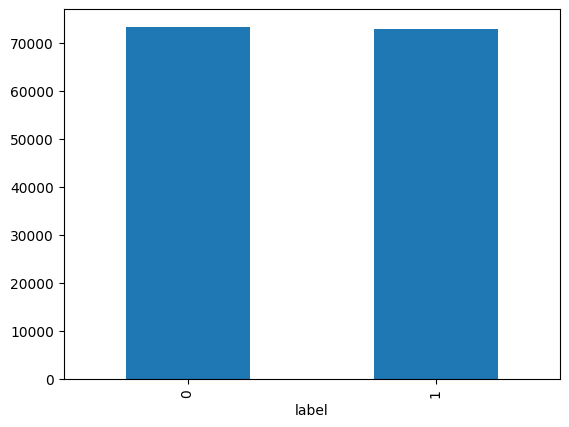

In [8]:
import matplotlib.pyplot as plt

train_data['label'].value_counts().plot(kind = 'bar')

plt.show()

In [9]:
train_data.loc[train_data.document.isnull()]

,document,label
25857,NaN,1


In [10]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

train_data.isnull().values.any()

False

In [11]:
#특수문자,기호 제거

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#                                                             [^] not 한글 => 공백
train_data[:3]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [12]:
import numpy as np

#공백 제거
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
train_data.isnull().sum()

document    0
label       0
dtype: int64

In [13]:
train_data.loc[train_data.document.isnull()][:3]

,document,label


In [14]:
#null 샘플 제거

train_data = train_data.dropna(how = 'any')

len(train_data)

146157

In [15]:
# test_data에도 동일한 과정 적용

test_data.drop_duplicates(subset = ['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

len(test_data)

49147

In [16]:
# 불용어 사전

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [17]:
from konlpy.tag import Okt

okt = Okt()
X_train = []  

#형태소 분석
#for sentence in train_data['document']:
for sentence in train_data['document'][:10000]:    
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [18]:
print(X_train[:3])

[['아', '더빙', '..', '진짜', '짜증나다', '목소리'], ['흠', '...', '포스터', '보고', '초딩', '영화', '줄', '....', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [19]:
# 테스트 데이터에 대한 토큰화

X_test = []
#for sentence in test_data['document']:
for sentence in test_data['document'][:10000]:    
    temp_X = okt.morphs(sentence, stem=True)    # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)

In [21]:
# 출현빈도가 3회 미만인 단어들

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print(total_cnt) #단어집합 크기
print(rare_cnt) #희귀단어수

13345
8891


In [22]:
vocab_size = total_cnt - rare_cnt + 1

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4455


In [23]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
import joblib 
joblib.dump(tokenizer, 'tokenizer.h5')

['tokenizer.h5']

In [25]:
print(X_train[:3])

[[59, 724, 4, 21, 259, 831], [725, 6, 378, 48, 678, 2, 178, 41, 1928, 29, 942, 769, 26], [373, 1613, 3462, 3, 249, 13]]


In [26]:
y_train = np.array(train_data['label'][:10000])
y_test = np.array(test_data['label'][:10000])

In [27]:
max_len=max(len(l) for l in X_train) #리뷰의 최대 길이
max_len

59

In [28]:
cnt = 0

for s in X_train:
  if(len(s) <= 30):
      cnt = cnt + 1

#최대 길이 이하인 샘플의 비율
(cnt / len(X_train))*100

93.58

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [30]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         445500    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 562,877
Trainable params: 562,877
Non-trainable params: 0
_________________________________________________________________


In [39]:
import tensorflow as tf
with tf.device('/:GPU0'):
    es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
    #     조기학습 종료          기준             최소      횟수
    #                           val_acc          max  
    mc = ModelCheckpoint('RNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    #       모델 백업
    model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10


125/125 [==============================] - ETA: 0s - loss: 0.1954 - acc: 0.9226
Epoch 1: val_acc improved from -inf to 0.80100, saving model to RNN_model.h5
125/125 [==============================] - 7s 53ms/step - loss: 0.1954 - acc: 0.9226 - val_loss: 0.5021 - val_acc: 0.8010
Epoch 2/10
124/125 [============================>.] - ETA: 0s - loss: 0.1816 - acc: 0.9294
Epoch 2: val_acc did not improve from 0.80100
125/125 [==============================] - 7s 53ms/step - loss: 0.1813 - acc: 0.9295 - val_loss: 0.5295 - val_acc: 0.7960
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.1635 - acc: 0.9381
Epoch 3: val_acc did not improve from 0.80100
125/125 [==============================] - 6s 49ms/step - loss: 0.1635 - acc: 0.9381 - val_loss: 0.5467 - val_acc: 0.7985
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.1476 - acc: 0.9408
Epoch 4: val_acc did not improve from 0.80100
125/125 [==============================] - 6s 48ms/step - loss: 0.

In [32]:
import tensorflow as tf
with tf.device('/:GPU0'):
    loaded_model = load_model('RNN_model.h5')
    loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.4223 - acc: 0.8097


In [33]:
def review_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측

  if(score > 0.5):
    print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")
  else:
    print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [34]:
import tensorflow as tf
with tf.device('/:GPU0'):
    review_predict('연기는 잔잔하게 볼 만 합니다')

1/1 [==============================] - 0s 333ms/step
98.08% 확률로 긍정 리뷰입니다.



In [35]:
import tensorflow as tf
with tf.device('/:GPU0'):
    review_predict('영화의 주제가 뭔지 모르겠음')

1/1 [==============================] - 0s 20ms/step
79.08% 확률로 부정 리뷰입니다.



In [36]:
import tensorflow as tf
with tf.device('/:GPU0'):
    review_predict('익살스런 연기가 돋보였던 영화')

1/1 [==============================] - 0s 20ms/step
96.57% 확률로 긍정 리뷰입니다.



In [37]:
import tensorflow as tf
with tf.device('/:GPU0'):
    review_predict('기대보다는 스토리가 큰 감흥은 없습니다')

1/1 [==============================] - 0s 21ms/step
99.06% 확률로 부정 리뷰입니다.



In [38]:
import tensorflow as tf
with tf.device('/:GPU0'):
    review_predict('지루하지는 않은데 완전 막장임... 돈주고 보기에는....')

1/1 [==============================] - 0s 54ms/step
99.35% 확률로 부정 리뷰입니다.

